In [1]:
import datasets
data = datasets.load_dataset('conll2012_ontonotesv5', 'chinese_v4')
data['train'][0]

/home/fqq/anaconda3/envs/myenv/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset conll2012_ontonotesv5 (/home/fqq/.cache/huggingface/datasets/conll2012_ontonotesv5/chinese_v4/1.0.0/c541e760a5983b07e403e77ccf1f10864a6ae3e3dc0b994112eff9f217198c65)
100%|██████████| 3/3 [00:00<00:00, 430.49it/s]


500
500
500


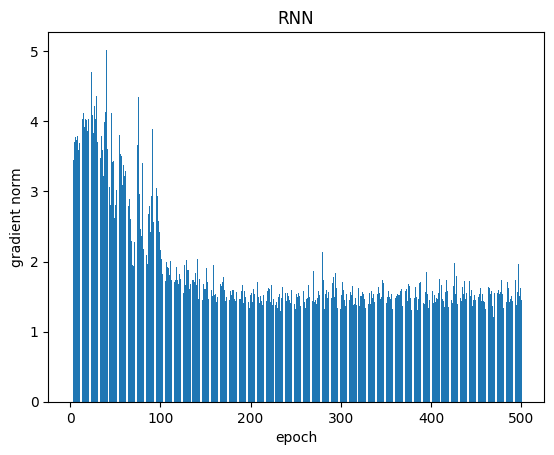

In [8]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
def read_json(log_path):
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            c = f.read()
            loc = re.finditer("Average Gradient Norm: ", c)
            n_l = []
            for x in loc:
                y = x.span()
                n_l.append(float(c[y[1]: y[1]+5]))
    n_l = np.array(n_l).reshape(500, 100).mean(axis=1)
    return n_l

rnn0 = read_json("./rnn0.txt")
lstm0 = read_json("./lstm0.txt")
lstm1 = read_json("./lstm1.txt")
print(len(rnn0))
print(len(lstm0))
print(len(lstm1))
x = np.arange(1, 501)
plt.bar(x, rnn0)
plt.title('RNN')
plt.xlabel('epoch')
plt.ylabel('gradient norm')

# 显示图形
plt.show()



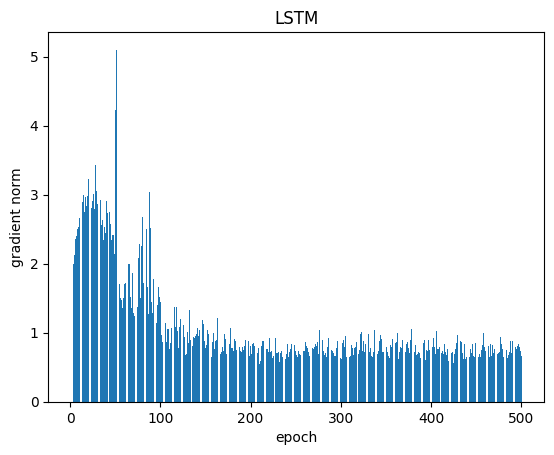

In [9]:
plt.bar(x, lstm0)
plt.title('LSTM')
plt.xlabel('epoch')
plt.ylabel('gradient norm')

# 显示图形
plt.show()

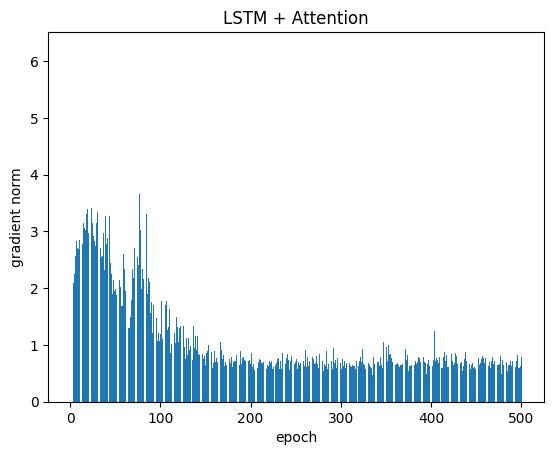

In [10]:
plt.bar(x, lstm1)
plt.title('LSTM + Attention')
plt.xlabel('epoch')
plt.ylabel('gradient norm')

# 显示图形
plt.show()